In [1]:
# ! uv pip install dotenv pyoso seaborn

In [2]:
from dotenv import load_dotenv
import json
import matplotlib.pyplot as plt
import os
from pyoso import Client
import pandas as pd
import requests
import seaborn as sns

load_dotenv()
OSO_API_KEY = os.environ['OSO_API_KEY']
client = Client(api_key=OSO_API_KEY)
stringify = lambda arr: "'" + "','".join(arr) + "'"

# Part 1. Explore Mini App DAUs the OSO 'world-mini-apps' collection

In [3]:
client.to_pandas("""
SELECT * 
FROM projects_by_collection_v1
WHERE collection_name = 'world-mini-apps'
""")

,project_id,project_source,project_namespace,project_name,collection_id,collection_source,collection_namespace,collection_name
0,+nrOhojOmp2WT5DAW/mRafQk5ONXSYhKv1Tc4QMHzCM=,OSS_DIRECTORY,oso,dnatokenio,T8j5O1N3GqANKLQ8GbGyAYGdGYKUwXAAPf+MpaSlW7g=,OSS_DIRECTORY,oso,world-mini-apps
1,0of3FDdW3hmpMmMGZRVOldf374zHeXd0he/7ytBKvP0=,OSS_DIRECTORY,oso,eatthepie,T8j5O1N3GqANKLQ8GbGyAYGdGYKUwXAAPf+MpaSlW7g=,OSS_DIRECTORY,oso,world-mini-apps
2,IEB9thzZmy4HLiqldjcssupHFgjHGN/HSF2I4HBQGmo=,OSS_DIRECTORY,oso,holdstation,T8j5O1N3GqANKLQ8GbGyAYGdGYKUwXAAPf+MpaSlW7g=,OSS_DIRECTORY,oso,world-mini-apps
3,fVzM4uUpSe7G+efKh0LlACBBiA1AyDxguzBBomquy48=,OSS_DIRECTORY,oso,kids-table-inc,T8j5O1N3GqANKLQ8GbGyAYGdGYKUwXAAPf+MpaSlW7g=,OSS_DIRECTORY,oso,world-mini-apps
4,m/11Ne9j9a/td9kiXSzd3W6itghruPsiqRUiAg5il+k=,OSS_DIRECTORY,oso,magnify-cash,T8j5O1N3GqANKLQ8GbGyAYGdGYKUwXAAPf+MpaSlW7g=,OSS_DIRECTORY,oso,world-mini-apps
5,vaFWWvAfQKz1t1aqvWwMJ/9bGytUUA+uuzB3Rq5smno=,OSS_DIRECTORY,oso,orb_contracts-johncpalmer,T8j5O1N3GqANKLQ8GbGyAYGdGYKUwXAAPf+MpaSlW7g=,OSS_DIRECTORY,oso,world-mini-apps
6,NhN0RANIkMVhVb9H162kD/zgezqPTx88hUfENieK1g0=,OSS_DIRECTORY,oso,pileum-org,T8j5O1N3GqANKLQ8GbGyAYGdGYKUwXAAPf+MpaSlW7g=,OSS_DIRECTORY,oso,world-mini-apps
7,Le5Jjy7InO7n2sG4B7i4rBKaaqyhFHEDCgbcyl9GLhk=,OSS_DIRECTORY,oso,rolu-abdulrahimiqbal,T8j5O1N3GqANKLQ8GbGyAYGdGYKUwXAAPf+MpaSlW7g=,OSS_DIRECTORY,oso,world-mini-apps
8,/FiIcDRtZMeb2a4fN1YTKEoyOozwBpdTtO3xvW5VpTo=,OSS_DIRECTORY,oso,world-mini-app-aion,T8j5O1N3GqANKLQ8GbGyAYGdGYKUwXAAPf+MpaSlW7g=,OSS_DIRECTORY,oso,world-mini-apps
9,AEdtfwfeNlSfkHJNMwa0dzJuSgPpUM+k6Eu0jmTeDjY=,OSS_DIRECTORY,oso,world-mini-app-birdgames,T8j5O1N3GqANKLQ8GbGyAYGdGYKUwXAAPf+MpaSlW7g=,OSS_DIRECTORY,oso,world-mini-apps


In [4]:
client.to_pandas("""
SELECT
  display_name,
  APPROX_DISTINCT(from_artifact_id) AS daily_active_user_count
FROM int_events_daily__worldchain_userops AS ops
JOIN artifacts_by_project_v1 AS abp ON abp.artifact_id = ops.to_artifact_id
JOIN projects_by_collection_v1 AS pbc USING (project_id)
JOIN projects_v1 USING (project_id)
WHERE
  collection_name = 'world-mini-apps'
  AND event_type = 'WORLDCHAIN_VERIFIED_USEROP'
  AND bucket_day = DATE('2025-07-01')
GROUP BY 1
ORDER BY 2 DESC
""")

,display_name,daily_active_user_count
0,Holdstation,61561
1,UNO,49259
2,Drop Wallet,34656
3,Kids Table Inc,31403
4,World Republic,30621
5,DNA Token,24394
6,FLAG!,18558
7,BirdGames,16173
8,PUF,15579
9,Otterverse,15084


# Part 2. Analyze user retention of Mini Apps in OP Atlas (Retro Funding)

In [5]:
df_retention = client.to_pandas("""
with contracts as (
  select
    artifact_id,
    project_id
  from artifacts_by_project_v1
  where
    project_source = 'OP_ATLAS'
    and artifact_source = 'WORLDCHAIN'
),
base as (
  select
    bucket_day,
    from_artifact_id as user_id,
    project_id
  from int_events_daily__worldchain_userops
  join contracts on artifact_id = to_artifact_id
  where event_type = 'WORLDCHAIN_VERIFIED_USEROP'
),
events as (
  select
    project_id,
    user_id,
    bucket_day,
    min(bucket_day) over(partition by project_id, user_id) as cohort_date
  from base
),
filtered as (
  select
    project_id,
    user_id,
    bucket_day,
    cohort_date
  from events
  where bucket_day between cohort_date and date_add('day', 30, cohort_date)
),
retention as (
  select
    project_id,
    count_if(bucket_day = cohort_date)                       as cohort_users,
    count_if(bucket_day = date_add('day',  1, cohort_date))  as day1_users,
    count_if(bucket_day = date_add('day',  2, cohort_date))  as day2_users,
    count_if(bucket_day = date_add('day',  3, cohort_date))  as day3_users,
    count_if(bucket_day = date_add('day',  4, cohort_date))  as day4_users,
    count_if(bucket_day = date_add('day',  5, cohort_date))  as day5_users,
    count_if(bucket_day = date_add('day',  6, cohort_date))  as day6_users,
    count_if(bucket_day = date_add('day',  7, cohort_date))  as day7_users,
    count_if(bucket_day = date_add('day', 30, cohort_date))  as day30_users
  from filtered
  group by project_id
)
select
  display_name as project_name,
  retention.*
from retention
join projects_v1 using(project_id)
""")

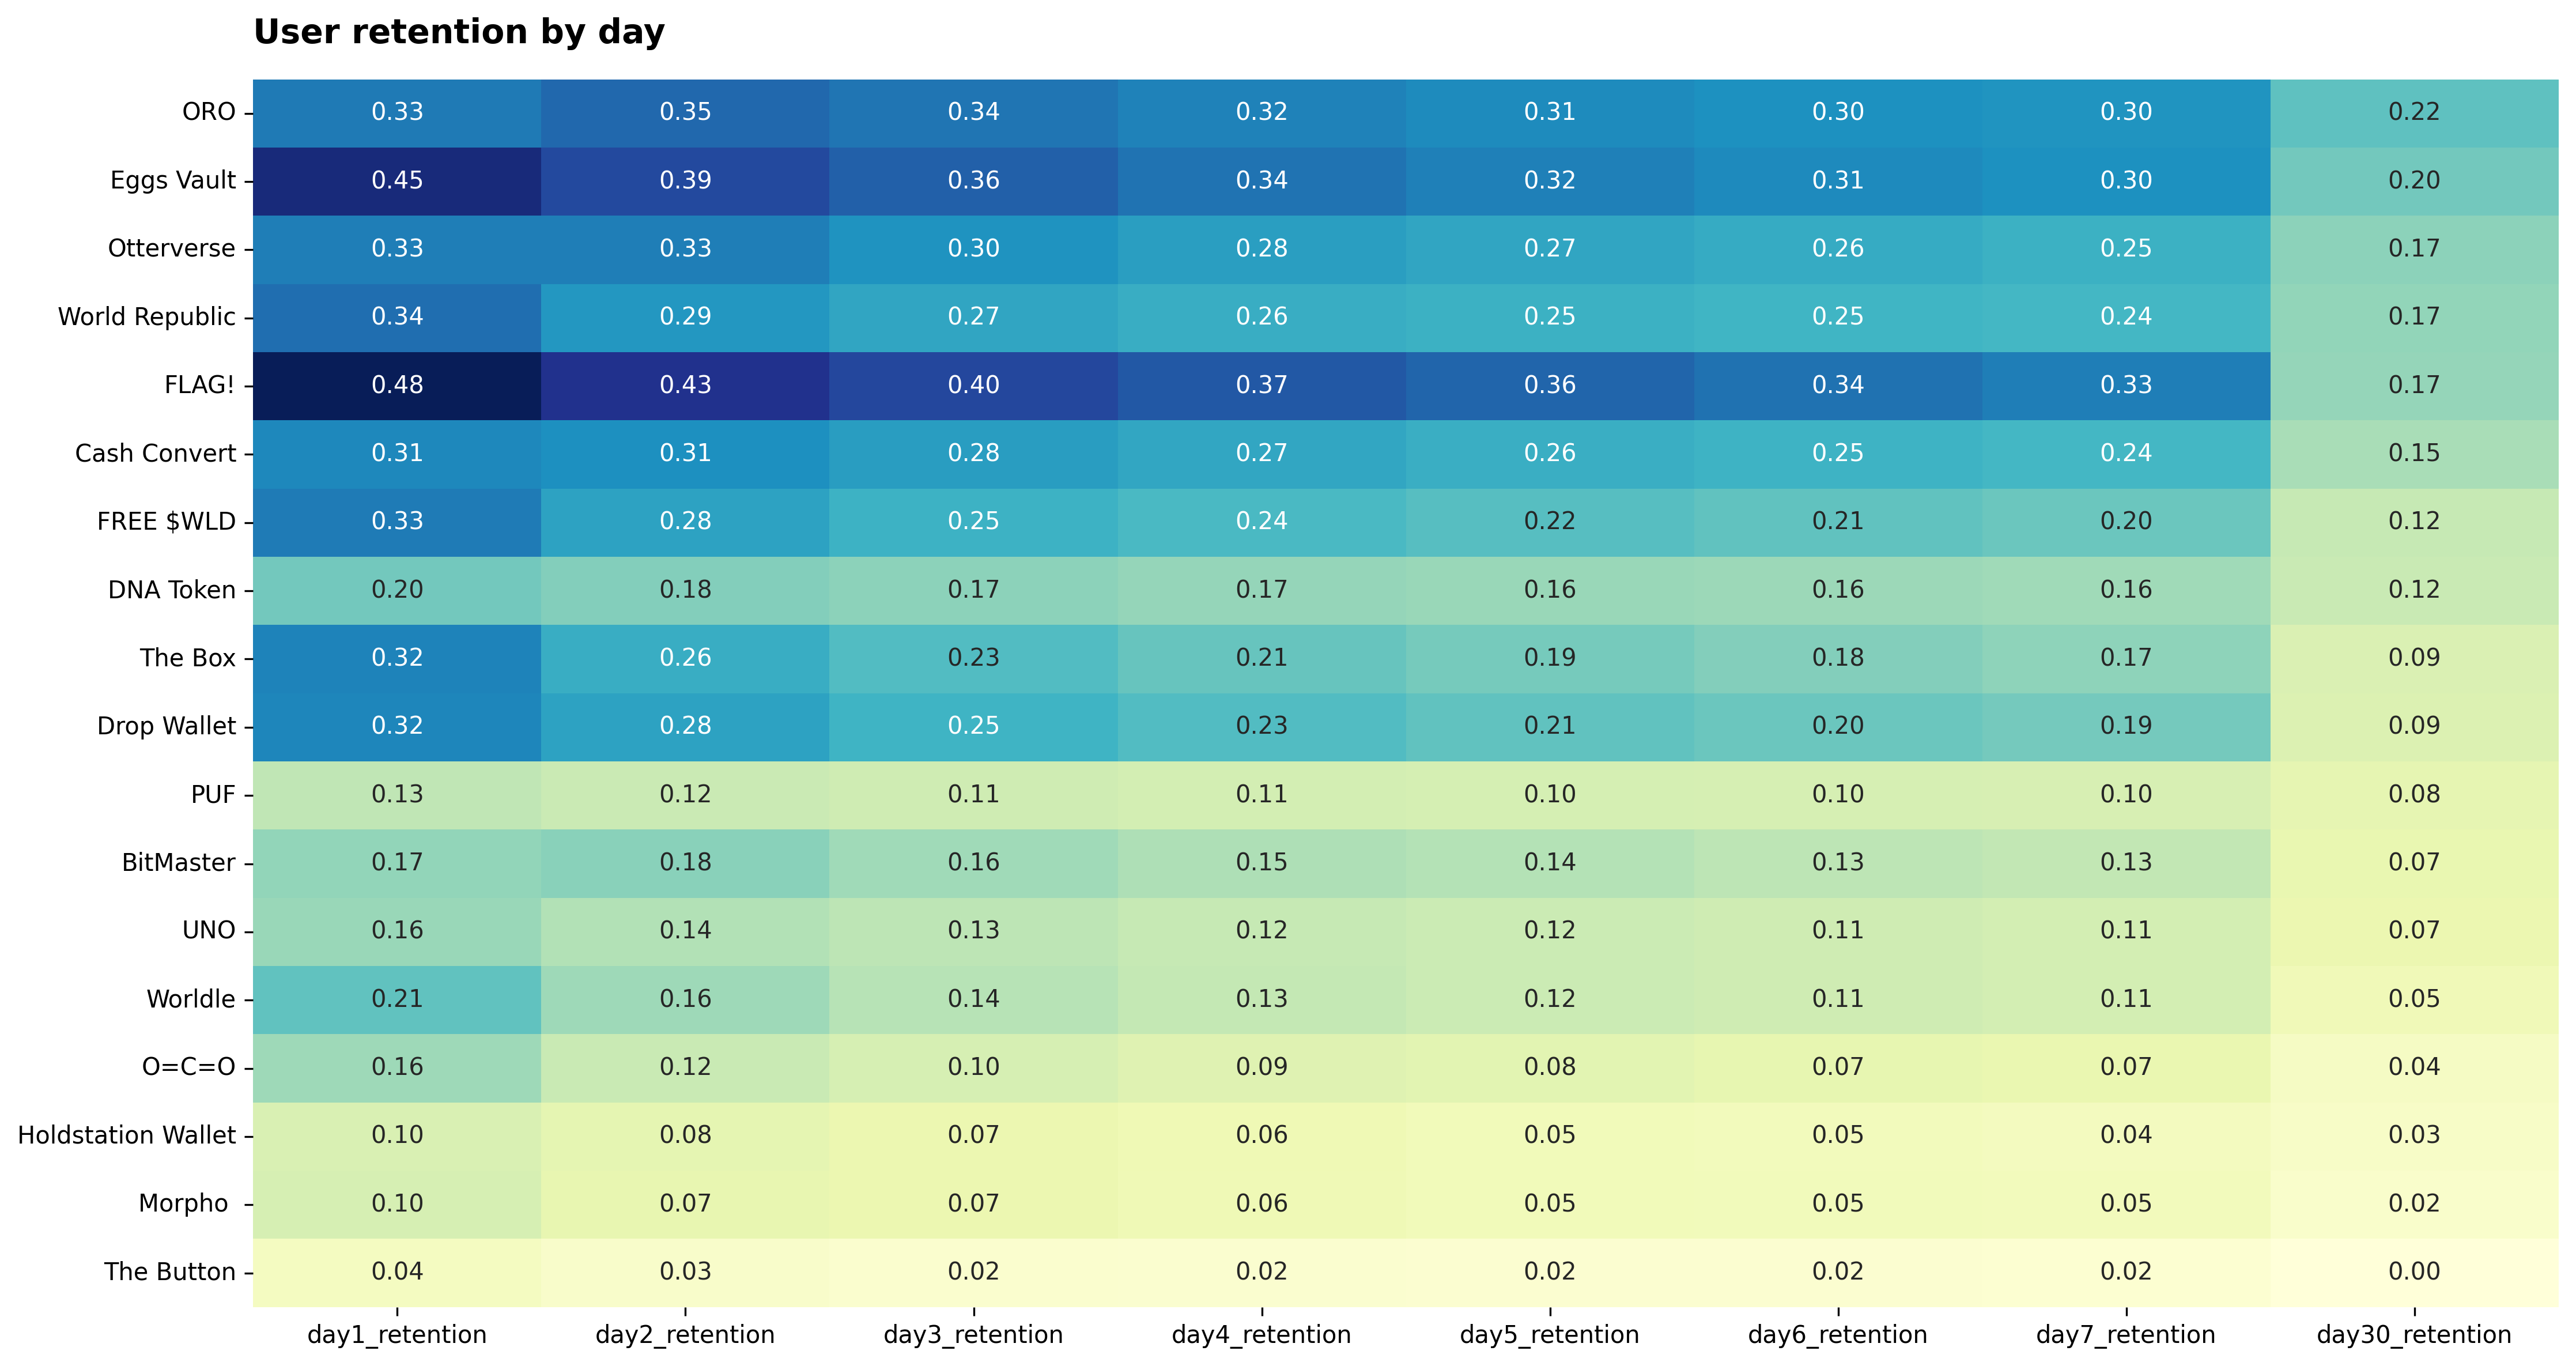

In [6]:
day_cols = [f"day{i}_users" for i in [1,2,3,4,5,6,7,30]]
ret_cols = [col.replace("_users", "_retention") for col in day_cols]
df_retention[ret_cols] = df_retention[day_cols].div(df_retention["cohort_users"], axis=0).round(4)
    
for col in ret_cols:
    df_retention[col] = pd.to_numeric(df_retention[col], errors='coerce')
df_retention[ret_cols] = df_retention[ret_cols].fillna(0)
df_retention['project_name'] = df_retention['project_name'].str.replace('＝','=')

plt.figure(figsize=(15, 8), dpi=300)
sns.heatmap(
    df_retention
    .sort_values(by='cohort_users', ascending=False)
    .set_index('project_name')[ret_cols].astype("float64").head(20)
    .sort_values(by='day30_retention', ascending=False).head(18),
    annot=True,
    cbar=False,
    fmt=".2f",
    cmap="YlGnBu"
)
plt.xticks(rotation=0)
plt.title("User retention by day", fontsize=14, pad=15, loc='left', weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

# Part 3: Get Mini App registry

In [7]:
r = requests.get("https://world-id-assets.com/api/v2/public/apps?skip_country_check=true")
data = r.json()

In [8]:
fields = [
    'app_id', 'name', 'short_name', 'source_code_url', 'app_website_url',
    'logo_img_url', 'verification_status', 'show_in_app_store',
    'team_name', 'unique_users', 'app_rating'
]
df_apps = pd.json_normalize(data['app_rankings']['top_apps'])[fields]
df_apps

,app_id,name,short_name,source_code_url,app_website_url,logo_img_url,verification_status,show_in_app_store,team_name,unique_users,app_rating
0,grants,Worldcoin,Worldcoin,,https://world.org,https://world-id-assets.com/app_d2905e660b94ad...,verified,True,World Foundation,17206480,4.19
1,app_a4f7f3e62c1de0b9490a5260cb390b56,UNO,UNO,,https://home.unoapp.xyz/,https://world-id-assets.com/app_a4f7f3e62c1de0...,verified,True,UNO Team,2676561,4.37
2,app_f1e44837a5e3c2af4da8925b46027645,ORO,ORO,,https://home.worldoro.com,https://world-id-assets.com/app_f1e44837a5e3c2...,verified,True,Grupo de Fiesta,2648179,4.53
3,app_0d4b759921490adc1f2bd569fda9b53a,Holdstation Wallet,Holdstation,,https://holdstation.com,https://world-id-assets.com/app_0d4b759921490a...,verified,True,Holdstation,451786,4.23
4,app_3876b5f39809a50bb5ebe97c997bbcf1,ORB,ORB,,https://www.orbtoken.xyz,https://world-id-assets.com/app_3876b5f39809a5...,verified,True,Global Solutions,1775482,4.58
...,...,...,...,...,...,...,...,...,...,...,...
319,app_794d969ba4f97b6580f3fa90c1d71d02,Rune Tale,Tale,,https://worldcoin.org/mini-app?app_id=app_794d...,https://world-id-assets.com/app_794d969ba4f97b...,verified,True,martin,56,5.00
320,app_9b17a90f67cc4ecc9df21a4037c8412c,Insurance,Insurance,,https://boxo.io,https://world-id-assets.com/app_9b17a90f67cc4e...,verified,True,Boxo,38,5.00
321,network,Network,Network,,https://world.org,https://world-id-assets.com/app_a23c6398432498...,verified,True,World Foundation,10504090,4.48
322,invites,Invites,Invites,,https://world.org,https://world-id-assets.com/app_432af83feb4051...,verified,True,World Foundation,8547452,4.30


In [9]:
contract_records = [
    {'app_id': app['app_id'], 'contract': contract.lower()}
    for app in data['app_rankings']['top_apps']
    for contract in (app.get('contracts') or [])
    if isinstance(contract, str) and contract.startswith('0x')
]
df_contracts = pd.DataFrame(contract_records).drop_duplicates()

In [10]:
df_deployers = client.to_pandas(f"""
SELECT
  contract_address AS contract,
  originating_address,
  root_deployer_address,
  factory_address
FROM contracts_v0
WHERE
  contract_namespace = 'WORLDCHAIN'
  AND contract_address IN ({stringify(df_contracts['contract'].unique())})
""")

In [11]:
df = (
    df_apps
    .sort_values(by='unique_users', ascending=False)
    .head(50)
    .merge(df_contracts, on='app_id', how='left')
    .merge(df_deployers, on='contract', how='left')
)
df

,app_id,name,short_name,source_code_url,app_website_url,logo_img_url,verification_status,show_in_app_store,team_name,unique_users,app_rating,contract,originating_address,root_deployer_address,factory_address
0,grants,Worldcoin,Worldcoin,,https://world.org,https://world-id-assets.com/app_d2905e660b94ad...,verified,True,World Foundation,17206480,4.19,NaN,<NA>,<NA>,<NA>
1,network,Network,Network,,https://world.org,https://world-id-assets.com/app_a23c6398432498...,verified,True,World Foundation,10504090,4.48,NaN,<NA>,<NA>,<NA>
2,invites,Invites,Invites,,https://world.org,https://world-id-assets.com/app_432af83feb4051...,verified,True,World Foundation,8547452,4.30,NaN,<NA>,<NA>,<NA>
3,app_e8288209fbe1fc4a1b80619e925a79bd,Learn,Learn,,https://learn.studios.toolsforhumanity.com/,https://world-id-assets.com/app_e8288209fbe1fc...,verified,True,Tools For Humanity,2833897,4.61,0xac13a09eeeeec48770713253a9bbcb5e36d52904,0x6348a4a4df173f68eb28a452ca6c13493e447af1,0x6348a4a4df173f68eb28a452ca6c13493e447af1,<NA>
4,app_e8288209fbe1fc4a1b80619e925a79bd,Learn,Learn,,https://learn.studios.toolsforhumanity.com/,https://world-id-assets.com/app_e8288209fbe1fc...,verified,True,Tools For Humanity,2833897,4.61,0x9a8d483cfd3e7c27bb2ec0f09eae8440f026f2c2,0x6348a4a4df173f68eb28a452ca6c13493e447af1,0x6348a4a4df173f68eb28a452ca6c13493e447af1,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,app_e40049a2b0b344c63754a954b84308df,World Shop,Shop,,https://world.org,https://world-id-assets.com/app_e40049a2b0b344...,verified,True,Tools For Humanity,182186,4.46,0x0dfb7137bc64b63f7a0de7cb9cda178702666220,0x4e260bb2b25ec6f3a59b478fcde5ed5b8d783b02,0x4e260bb2b25ec6f3a59b478fcde5ed5b8d783b02,<NA>
131,app_e40049a2b0b344c63754a954b84308df,World Shop,Shop,,https://world.org,https://world-id-assets.com/app_e40049a2b0b344...,verified,True,Tools For Humanity,182186,4.46,0x886eb82a7e5e7310f66a0e83748662a17e391eb0,0x4e260bb2b25ec6f3a59b478fcde5ed5b8d783b02,0x4e260bb2b25ec6f3a59b478fcde5ed5b8d783b02,<NA>
132,app_56377289d3ebcbe58376ce590fb37de8,WorldPot,WorldPot,,https://wld-mini-app.worldpot.io,https://world-id-assets.com/app_56377289d3ebcb...,verified,True,WorldPot,181767,4.25,0x82afd0cdbb3d6396328351336cd74bd7d5a6e636,0x5366b8f5ce7494ec832371859483ab88070bacfb,0x5366b8f5ce7494ec832371859483ab88070bacfb,<NA>
133,app_18f37b2ab23f96d0032da81048f19914,MintArt,MintArt,,https://world-art-ldn.vercel.app/,https://world-id-assets.com/app_18f37b2ab23f96...,verified,True,World Art Team,181409,4.39,NaN,<NA>,<NA>,<NA>
